# Stirring Minds Test Tasks

# Data Science Tasks

## TASK DS8

## For the dataset named “iris” consisting of attributes such as sepal length, petal length, sepal width, petal width and Species. Perform Divisive hierarchical clustering and plot the dendrogram obtained and find the divisive coefficient.

## Hierarchical Clustering

 #### Hierarchical clustering is a approach for identifying groups in the dataset.
 #### There are two types of Hierarchical Clustering:
 
 1) Agglomerative Hierarchical Clustering 
 
 2) Divisive Hierarchical Clustering

Difference between Agglomerative and Divisive Hierarchical Clustering is that Agglomerative Hierarchical clustering method allows the clusters to be read from bottom to top and it follows this approach so that the program always reads from the sub-component first then moves to the parent whereas, divisive uses top-bottom approach in which the parent is visited first then the child.

## Divisive Hierarchical Clustering

### Importing the Libraries

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading the Dataset

In [107]:
data = pd.read_csv('Iris.csv')

In [108]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [109]:
data.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [110]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [111]:
data.dtypes # data types

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [112]:
data.describe() # Descriptive Statistics

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
del data['Id'] # delete unnecessary coulumn 'Id'

In [114]:
data.head() # top 5 rows from the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
data.sample(10) # random sapmles from the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,4.6,3.6,1.0,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa


In [116]:
data.isnull() # null values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [117]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [118]:
# Total number of the different species present in the dataset
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [119]:
data.corr() # correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


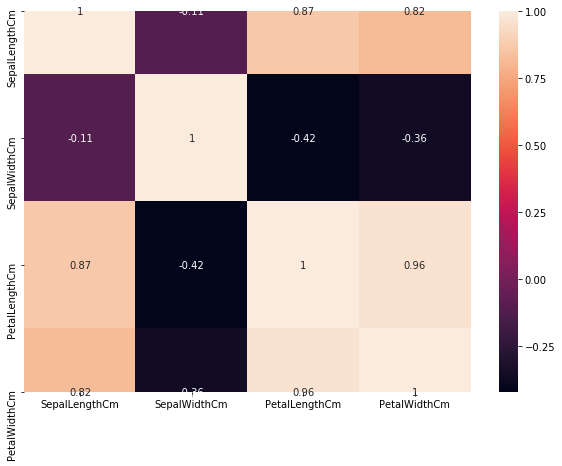

In [120]:
# Plotting the heat map
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot = True)

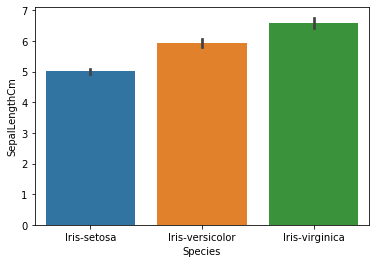

In [121]:
sns.barplot(x='Species', y='SepalLengthCm', data= data)

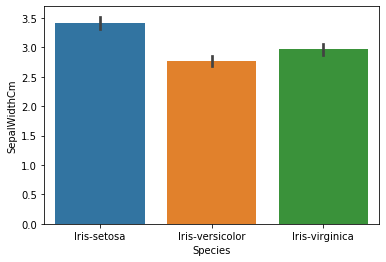

In [122]:
sns.barplot(x='Species', y='SepalWidthCm', data= data)

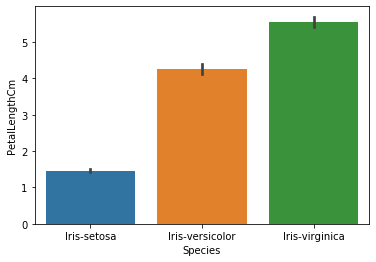

In [123]:
sns.barplot(x='Species', y='PetalLengthCm', data= data)

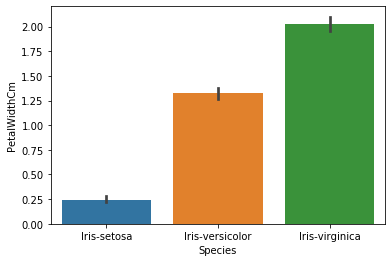

In [124]:
sns.barplot(x='Species', y='PetalWidthCm', data= data)

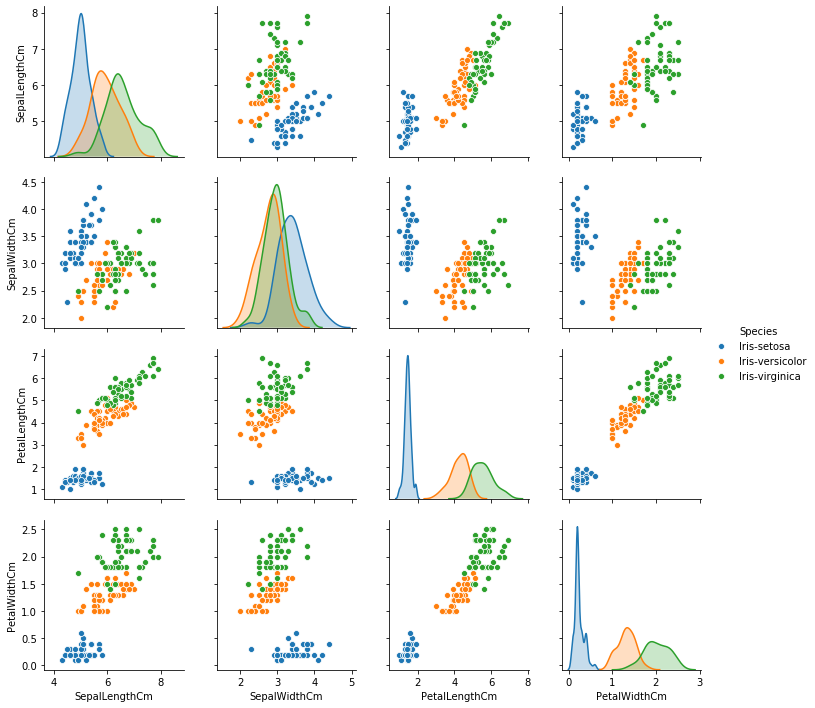

In [125]:
sns.pairplot(data, hue='Species')

### Creating the matrix of features

In [126]:
X = data.iloc[:, 0:4].values

In [127]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [128]:
X.shape

(150, 4)

## Dendrogram to find the number of Divisions

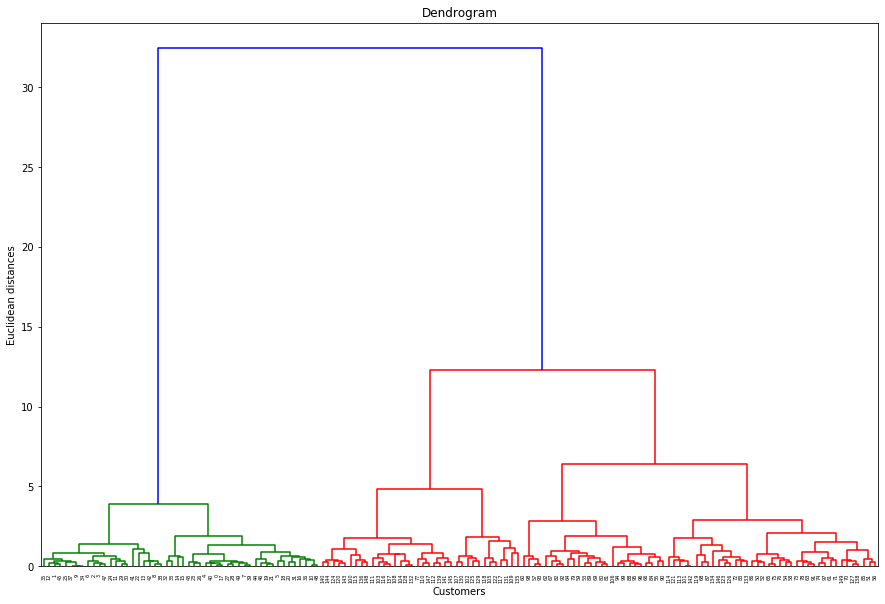

In [129]:
# Using the Dendrogram to find the number of divisions
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### The above dendrogram show that there are 2 divisions in the dataset

# TASK DS9

## Consider the dataset named iris which consists of data of different species and their attributes. Perform the following operations to the dataset:
## a. Import the data set
## b. Store the split data into separate variables.
## c. Create a Naive Bayes model on the training dataset
## d. Now predict the data model for a testing dataset that you have separated in bit b.

# Naive Bayes Classification implemented on Iris Dataset

### Importing the Libraries

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### a. Import the data set

In [131]:
data = pd.read_csv('Iris.csv')

In [132]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [133]:
data.sample(10) # random samples from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
33,34,5.5,4.2,1.4,0.2,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa


In [134]:
del data['Id'] # deleting unwanted columns

In [135]:
data.head() # top 5 rows from the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### b. Store the split data into separate variables.

#### The data is divided into two variables where 'X' contains the dependent variables(SepalLengthCm, SepalWidthCm, PetalWidthCm, PetalLengthCm) and 'b' contains the target variable(Species)

### Creating the Matrix of Features

In [136]:
X = data.iloc[:, 0:4].values
b = data.iloc[:, 4].values

In [137]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [138]:
X.shape

(150, 4)

In [139]:
b

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [140]:
b.shape

(150,)

### Splitting the dataset into Training Set and Test Set

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, b_train, b_test = train_test_split(X, b, test_size=0.2, random_state=0)

In [142]:
X_train

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2

In [143]:
X_train.shape

(120, 4)

In [144]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4]])

In [145]:
X_test.shape

(30, 4)

In [146]:
b_train

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris

In [147]:
b_train.shape

(120,)

In [148]:
b_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [149]:
b_test.shape

(30,)

In [150]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [151]:
X_train

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

In [152]:
X_train.shape

(120, 4)

In [153]:
X_test

array([[-0.09544771, -0.58900572,  0.72247648,  1.51195265],
       [ 0.14071157, -1.98401928,  0.10361279, -0.29851096],
       [-0.44968663,  2.66602591, -1.35915595, -1.3330616 ],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.73603967],
       [-1.04008484,  0.80600783, -1.30289562, -1.3330616 ],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64127148],
       [-1.04008484,  1.03851009, -1.41541629, -1.20374277],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34808318],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21876435],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08944552],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21876435],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34808318],
       [ 0.25879121, -0.58900572,  0.49743514, -0.03987331],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34808318],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21876435],
       [-1.15816448,  0.10850105, -1.30289562, -1.46238043],
       [ 0.14071157, -0.

In [154]:
X_test.shape

(30, 4)

### c. Create a Naive Bayes model on the training dataset

In [155]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, b_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### d. Now predict the data model for a testing dataset that you have separated in bit b.

In [156]:
b_pred = classifier.predict(X_test)
b_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

### Making the Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(b_test, b_pred)

In [158]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

### According to the Confusion matrix, the diagonal shows the correct predictions. So, 11+13+5 = 29 are the correct predictions made by the model and there is only 1 incorrect prediction

### Accuracy of the Model

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(b_test, b_pred)

0.9666666666666667

### The accuracy of the model is 96.6%

In [170]:
from sklearn import metrics
print(metrics.classification_report(b_test, b_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

